# Import libraries

In [111]:
# scientific packages
import numpy as py
import sklearn as sk
import pandas as pd

# utils
from dotenv import load_dotenv

# Data Collection and Processing
## Collection
In order to actually run the PCA, I need to get a bunch of data to analyze from Spotify. I already have a Spotify application set up with a `client id` and `client secret`. Using the **`spotipy`** package, we can randomly search for songs and put them into a csv for which we can then run a PCA. This was done beforehand and you can see the code for this in `collect_data.py` We can directly load the data into a `pandas` DataFrame.

In [112]:
# load data into csv
df_raw = pd.read_csv('data.csv')

# examine
df_raw.head()

,Unnamed: 0,name,id,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Sexo Virtual,0giiXonRhODYy4J1iy4Lb3,Rauw Alejandro,puerto rican pop,0.32800,0.704,0.739,0.000019,0.0856,-3.286,0.1120,179.879,0.425
1,1,Tell The Vision (feat. Kanye West & Pusha T),2UwALqx6yOsXTFt7zRxnts,Pop Smoke,brooklyn drill,0.25100,0.662,0.686,0.000006,0.3490,-8.302,0.3320,143.971,0.678
2,2,La Venganza,0Pe4DpJDmZtOybHgrZ1hyM,J Balvin,latin,0.32400,0.784,0.702,0.000002,0.1170,-3.884,0.0500,92.000,0.538
3,3,Me Vs Me,1lUTmmPMAsxZBR2iK9CKDF,Moneybagg Yo,hip hop,0.20500,0.853,0.821,0.000000,0.2090,-4.537,0.2090,130.999,0.625
4,4,Heat Above,0zlaa4AmbFE7MVDijsyD9Q,Greta Van Fleet,modern blues rock,0.00881,0.338,0.847,0.001050,0.1470,-3.692,0.0458,139.061,0.232


## Processing
First we need to drop any rows that contain `None` values (which did happen).

In [113]:
# drop any rows that contain missing values
df_raw.dropna()

,Unnamed: 0,name,id,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Sexo Virtual,0giiXonRhODYy4J1iy4Lb3,Rauw Alejandro,puerto rican pop,0.32800,0.704,0.739,0.000019,0.0856,-3.286,0.1120,179.879,0.425
1,1,Tell The Vision (feat. Kanye West & Pusha T),2UwALqx6yOsXTFt7zRxnts,Pop Smoke,brooklyn drill,0.25100,0.662,0.686,0.000006,0.3490,-8.302,0.3320,143.971,0.678
2,2,La Venganza,0Pe4DpJDmZtOybHgrZ1hyM,J Balvin,latin,0.32400,0.784,0.702,0.000002,0.1170,-3.884,0.0500,92.000,0.538
3,3,Me Vs Me,1lUTmmPMAsxZBR2iK9CKDF,Moneybagg Yo,hip hop,0.20500,0.853,0.821,0.000000,0.2090,-4.537,0.2090,130.999,0.625
4,4,Heat Above,0zlaa4AmbFE7MVDijsyD9Q,Greta Van Fleet,modern blues rock,0.00881,0.338,0.847,0.001050,0.1470,-3.692,0.0458,139.061,0.232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,Verbatim,266Vb7ItE3o1q8HdJ9QOvn,Mother Mother,vancouver indie,0.30900,0.827,0.580,0.000000,0.1480,-6.809,0.3270,78.011,0.492
4995,4995,Bleach,5C33XaYYMuEKvGmABGHwOa,$uicideboy$,dark trap,0.22400,0.809,0.816,0.001020,0.4470,-5.359,0.4190,131.976,0.399
4996,4996,Follow Me,4KoecuyOpZaNFZ0UqVsllc,Uncle Kracker,country,0.43900,0.817,0.585,0.000000,0.1470,-4.688,0.0301,105.014,0.916
4997,4997,What About Us,0Qh38w01QRXK6KHIv0e3hb,P!nk,dance pop,0.02810,0.491,0.588,0.000002,0.0906,-6.177,0.0506,113.608,0.193


Now we can standardize out data. This step is crucial to ensure that our PCA can extract the true components which contribute the most to the dataset variance. First lets define our features. These will just be the audio feature analysis. We cannot standardize string data (nor do we want to).

In [114]:
from sklearn import preprocessing

features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence'
]

# standardize and stuff back in
data_standardized = preprocessing.scale(df_raw.loc[:,features])
df_standardized = df_raw
df_standardized.loc[:, features] = data_standardized


Lets take a look at that data

In [115]:
df_standardized.head()

,Unnamed: 0,name,id,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Sexo Virtual,0giiXonRhODYy4J1iy4Lb3,Rauw Alejandro,puerto rican pop,0.385919,0.349739,0.563581,-0.218984,-0.678743,1.027666,0.010579,1.966520,-0.350594
1,1,Tell The Vision (feat. Kanye West & Pusha T),2UwALqx6yOsXTFt7zRxnts,Pop Smoke,brooklyn drill,0.084404,0.081440,0.282269,-0.219081,1.280408,-0.359477,2.002535,0.759820,0.740442
2,2,La Venganza,0Pe4DpJDmZtOybHgrZ1hyM,J Balvin,latin,0.370256,0.860786,0.367193,-0.219108,-0.445192,0.862293,-0.550790,-0.986682,0.136707
3,3,Me Vs Me,1lUTmmPMAsxZBR2iK9CKDF,Moneybagg Yo,hip hop,-0.095722,1.301564,0.998818,-0.219121,0.239098,0.681710,0.888851,0.323892,0.511885
4,4,Heat Above,0zlaa4AmbFE7MVDijsyD9Q,Greta Van Fleet,modern blues rock,-0.863960,-1.988299,1.136820,-0.211662,-0.222054,0.915389,-0.588819,0.594818,-1.182887


# Running the PCA
We can now run our Principle Component Analysis on the standardized data.

In [116]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_standardized.loc[:, features])

PCA()

Let's convert the variance ratios into percentages, create some labels, and then plot.

In [117]:
pca_values = [val * 100 for val in pca.explained_variance_ratio_]
labels = ['PC_' + str(i+1) for i in range(len(pca.explained_variance_ratio_))]

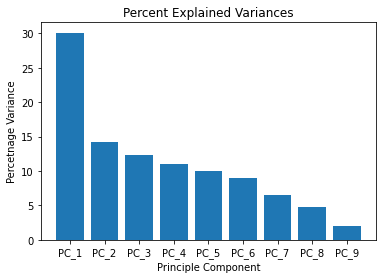

In [118]:
import matplotlib.pyplot as plt

plt.bar(range(len(pca_values)), height=pca_values, tick_label=labels)
plt.title('Percent Explained Variances')
plt.xlabel('Principle Component')
plt.ylabel('Percetnage Variance')
plt.show()

Lets view how our top 3 principle components can differntiate out data

In [119]:
pca_fit = pca.fit_transform(df_standardized.loc[:,features])
df_pca = pd.DataFrame(pca_fit, columns=labels)

# plt.scatter(df_pca.loc[:, 'PC_1'], df_pca.loc[:,'PC_2'])
# plt.show()

In [120]:
meta_cols = ['name', 'id', 'artist', 'genre']
df_pca_annotated = pd.concat([df_raw.loc[:,meta_cols], df_pca.loc[:,labels]], axis=1)

In [144]:
# what are our top genres lited?
df_pca_annotated['genre'].value_counts().head(10)

dance pop               517
contemporary country    340
pop                     193
latin                   191
hip hop                 175
chicago rap             160
atl hip hop             150
alternative metal       147
album rock              145
melodic rap             122
Name: genre, dtype: int64

In [146]:
# extract out genres
country_data = df_pca_annotated.loc[df_pca_annotated['genre'] == 'contemporary country']
pop_data = df_pca_annotated.loc[df_pca_annotated['genre'] == 'pop']
hiphop_data = df_pca_annotated.loc[df_pca_annotated['genre'] == 'hip hop']

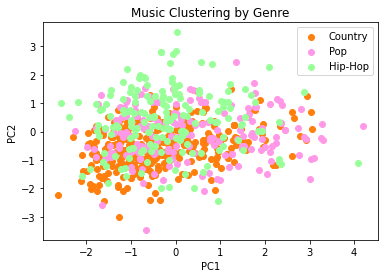

In [150]:
plt.scatter(country_data['PC_1'], country_data['PC_2'], c=['#ff7f0e'])
plt.scatter(pop_data['PC_1'], pop_data['PC_2'], c=['#ff99e7'])
plt.scatter(hiphop_data['PC_1'], hiphop_data['PC_2'], c=['#99ff99'])
plt.legend(['Country', 'Pop', 'Hip-Hop'])
plt.title('Music Clustering by Genre')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()